In [1]:
import numpy as np 
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
images, labels = (x_train[0:1000].reshape(1000, 28*28) / 255, y_train[0:1000])
images.shape, x_train.shape

((1000, 784), (60000, 28, 28))

In [4]:
one_hot_labels = np.zeros((len(labels), 10))
for i, l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

In [5]:
test_images = x_test.reshape(len(x_test), 28*28)/255
test_labels = np.zeros((len(y_test), 10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1
    

Text(0.5, 1.0, '5')

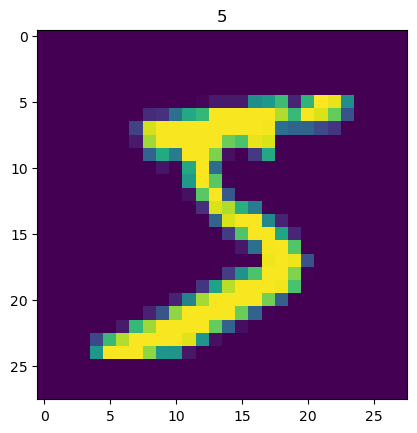

In [6]:
plt.imshow(x_train[0])
plt.title(y_train[0])


In [7]:
np.random.seed(1)
relu = lambda x:(x >= 0) * x
relu2deriv = lambda x: x >=0

lr = 0.005
iterations = 100
hidden_size = 40
pixels_per_image = 784
num_labels = 10

weight_0_1 = 0.2 * np.random.random((pixels_per_image, hidden_size)) - 0.1
weight_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1


In [16]:
for epoch in range(iterations):
    error = 0.0
    correct_cnt = 0
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(layer_0.dot(weight_0_1))
        layer_2 = layer_1.dot(weight_1_2)
        
        error += np.sum((layer_2 - labels[i])**2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weight_1_2.T)*relu2deriv(layer_1)
        
        weight_1_2 += lr * layer_1.T.dot(layer_2_delta)
        weight_0_1 += lr * layer_0.T.dot(layer_1_delta)
        
        sys.stdout.write("\r"+ \
                        "I:"+str(epoch)+\
                        ", Error:" + str(error/float(len(images)))[0:5] + \
                        ", correct:" + str(correct_cnt/float(len(images))))
        
        

I:9, Error:0.242, correct:0.961